In [1]:
import gurobi

In [1]:
from gurobipy import *

In [5]:
m = Model()
v0=m.addVar()
v1=m.addVar()
m.update()
m.addConstr(v0 - v1 >= 0)
m.addConstr(v0 + v1 <= 4)
m.addConstr(-0.25*v0 +v1 <= 1)
m.setObjective(220*v0+190*v1+235,GRB.MAXIMIZE)
m.params.outputflag = 0
m.optimize()

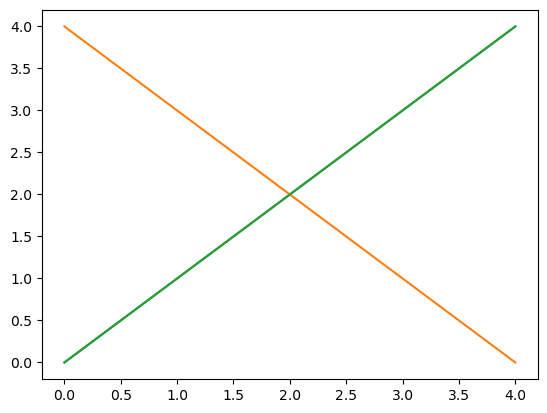

In [6]:
import matplotlib.pyplot as pyplot
pyplot.plot([0,4],[0,4])
pyplot.plot([4,0],[0,4])
pyplot.plot([0,4],[0,4])

# facility location problem demo

In [1]:
from itertools import product
from math import sqrt

import gurobipy as gp
from gurobipy import GRB

# tested with Gurobi v9.1.0 and Python 3.7.0

# Parameters
customers = [(0,1.5), (2.5,1.2)]
facilities = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]
setup_cost = [3,2,3,1,3,3,4,3,2]
cost_per_mile = 1

In [2]:

# This function determines the Euclidean distance between a facility and customer sites.

def compute_distance(loc1, loc2):
    dx = loc1[0] - loc2[0]
    dy = loc1[1] - loc2[1]
    return sqrt(dx*dx + dy*dy)

# Compute key parameters of MIP model formulation

num_facilities = len(facilities)
num_customers = len(customers)
cartesian_prod = list(product(range(num_customers), range(num_facilities)))

# Compute shipping costs

shipping_cost = {(c,f): cost_per_mile*compute_distance(customers[c], facilities[f]) for c, f in cartesian_prod}

In [6]:
# MIP  model formulation

m = gp.Model('facility_location')

select = m.addVars(num_facilities, vtype=GRB.BINARY, name='Select')
assign = m.addVars(cartesian_prod, ub=1, vtype=GRB.CONTINUOUS, name='Assign')

m.addConstrs((assign[(c,f)] <= select[f] for c,f in cartesian_prod), name='Setup2ship')
m.addConstrs((gp.quicksum(assign[(c,f)] for f in range(num_facilities)) == 1 for c in range(num_customers)), name='Demand')

m.setObjective(select.prod(setup_cost)+assign.prod(shipping_cost), GRB.MINIMIZE)

m.write("Class2Facilityexample.lp")###增加了一个文件 运行过程download the model

m.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 20 rows, 27 columns and 54 nonzeros
Model fingerprint: 0x0939f503
Variable types: 18 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 20 rows, 27 columns, 54 nonzeros
Variable types: 18 continuous, 9 integer (9 binary)
Found heuristic solution: objective 6.0385165

Root relaxation: objective 4.723713e+00, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       4.7237129    4.72371  0.00%     -    0s

Explored 1 nodes (15 simplex iterations) in 0.01 seconds

In [4]:
# display optimal values of decision variables

for facility in select.keys():
    if (abs(select[facility].x) > 1e-6):
        print(f"\n Build a warehouse at location {facility + 1}.")


 Build a warehouse at location 4.


In [5]:
# Shipments from facilities to customers.

for customer, facility in assign.keys():
    if (abs(assign[customer, facility].x) > 1e-6):
        print(f"\n Supermarket {customer + 1} receives {round(100*assign[customer, facility].x, 2)} % of its demand  from Warehouse {facility + 1} .")


 Supermarket 1 receives 100.0 % of its demand  from Warehouse 4 .

 Supermarket 2 receives 100.0 % of its demand  from Warehouse 4 .
